In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("advertising.csv")

In [4]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


<Axes: >

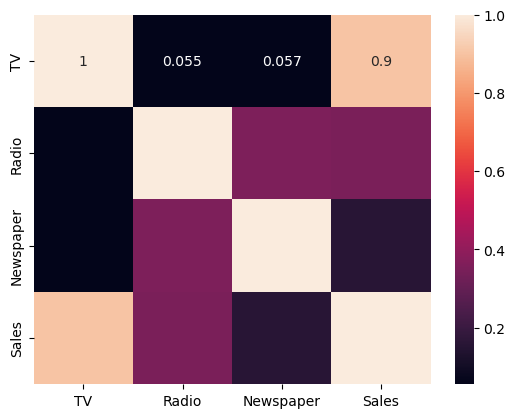

In [5]:
sns.heatmap(data.corr(),annot=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1d9c822bf90>,
 'caps': [<matplotlib.lines.Line2D at 0x1d9c82a0450>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d9c828e110>,
 'medians': [<matplotlib.lines.Line2D at 0x1d9c82a1a50>,
 'fliers': [<matplotlib.lines.Line2D at 0x1d9c82a2550>,
 'means': []}

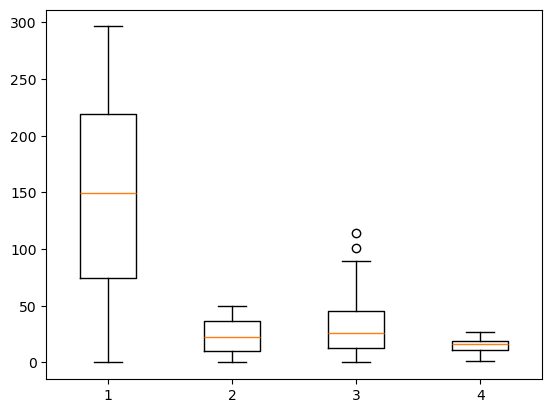

In [6]:
plt.boxplot(data)

In [7]:
datanew= data[data["Newspaper"]<90]



In [8]:
datanew

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [9]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [10]:
x=data[['TV','Radio','Newspaper']]
y=data[['Sales']]

In [11]:
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [12]:
y

,Sales
0,22.1
1,10.4
2,12.0
3,16.5
4,17.9
...,...
195,7.6
196,14.0
197,14.8
198,25.5


In [13]:
data.shape

(200, 4)

In [14]:
x.shape

(200, 3)

In [15]:
y.shape

(200, 1)

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [17]:
print(x_train.shape)
print(x_test.shape)
print()
print(y_train.shape)
print(x_test.shape)

(160, 3)
(40, 3)

(160, 1)
(40, 3)


In [18]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

In [19]:
lm.fit(x_train,y_train)

LinearRegression()

In [20]:
print(lm.coef_)

[[0.0542032  0.1017085  0.00177016]]


In [21]:
print(lm.intercept_)

[4.7412925]


<Axes: >

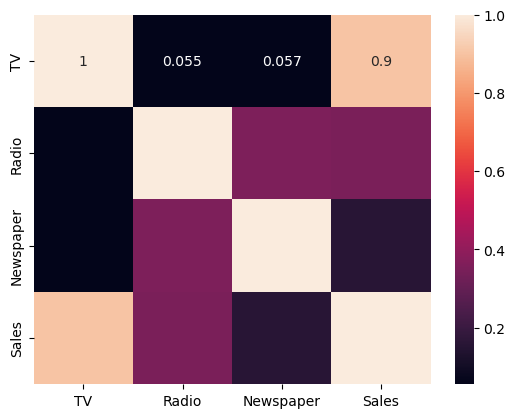

In [22]:
sns.heatmap(data.corr(),annot=True)

In [23]:
y_pred = lm.predict(x_test)

In [24]:
y_pred

array([[ 9.20852491],
       [14.10595607],
       [20.14222466],
       [13.50864787],
       [21.00569758],
       [ 6.43125641],
       [21.02388543],
       [ 8.79234926],
       [16.57647396],
       [20.27773458],
       [15.29247677],
       [18.13086303],
       [14.82231292],
       [20.7822076 ],
       [11.07280518],
       [23.57223097],
       [12.34059893],
       [19.23147642],
       [20.99416611],
       [16.90030503],
       [11.16606785],
       [ 7.1617399 ],
       [16.48695496],
       [18.21641881],
       [12.46503777],
       [21.27880354],
       [15.87306114],
       [24.83686104],
       [12.39033093],
       [11.85290974],
       [19.49112321],
       [22.98564514],
       [ 9.74256853],
       [14.34468581],
       [ 9.85520001],
       [21.31289808],
       [15.48929272],
       [20.42558744],
       [19.23180248],
       [24.12050428]])

In [28]:
new_df = pd.DataFrame()
new_df = x_test
new_df['actual sales']= y_test
new_df['predicted sales']= y_pred
new_df

,TV,Radio,Newspaper,actual sales,predicted sales
158,11.7,36.9,45.2,7.3,9.208525
57,136.2,19.2,16.6,13.2,14.105956
133,219.8,33.5,45.1,19.6,20.142225
180,156.6,2.6,8.3,15.5,13.508648
69,216.8,43.9,27.2,22.3,21.005698
76,27.5,1.6,20.7,6.9,6.431256
28,248.8,27.1,22.9,18.9,21.023885
44,25.1,25.7,43.3,8.5,8.792349
45,175.1,22.5,31.5,16.1,16.576474
15,195.4,47.7,52.9,22.4,20.277735


In [29]:
lm.score(x_train,y_train)*100

89.24480845411846

In [30]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(y_test,y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE:",rmse)

R-squared: 0.9349344232819901
RMSE: 1.3498853095124552
